<a href="https://colab.research.google.com/github/Utpal-Mishra/Python-Credit-Card-Fraud-Detection/blob/main/CreditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INSTALLING PACKAGES

In [ ]:
!pip install --upgrade keras
!pip install -q tensorflow==2.0beta1

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.3.1)


#LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time

#IMPORTING DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
path = '/content/drive/My Drive/CreditCardFraud/creditcard.csv'
df = pd.read_csv(path)

In [ ]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470400,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125894,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624502,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108301,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095922,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798279,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#DATA VISUALIZATION

In [ ]:
print(df.shape)
df.describe()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,-1.193650e-11,-8.321435e-11,-1.193722e-10,-5.758218e-11,-8.075736e-12,-4.880404e-11,1.685322e-11,6.249845e-11,1.551921e-10,2.598242e-11,2.247260e-11,-2.071656e-11,-3.721897e-11,-1.148146e-10,-1.278054e-10,-3.159957e-12,-4.178273e-11,3.581405e-11,-5.723168e-11,5.372069e-11,1.860924e-11,4.880475e-11,-2.071527e-11,2.703579e-11,8.286263e-11,-4.880476e-11,9.128964e-12,5.617856e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203733e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915970e-01,-7.682956e-01,-5.540759e-01,-2.086298e-01,-6.430976e-01,-5.354258e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545862e-01,-3.171450e-01,-3.269839e-01,-7.083955e-02,-5.295980e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548560e-02,1.798463e-01,-1.984650e-02,-5.433580e-02,-2.741871e-01,4.010310e-02,2.235800e-02,-5.142870e-02,-9.291740e-02,-3.275740e-02,1.400326e-01,-1.356810e-02,5.060130e-02,4.807150e-02,6.641330e-02,-6.567580e-02,-3.636300e-03,3.734800e-03,-6.248110e-02,-2.945020e-02,6.781900e-03,-1.119290e-02,4.097610e-02,1.659350e-02,-5.213910e-02,1.342100e-03,1.124380e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027195e+00,7.433412e-01,6.119265e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971391e-01,4.539235e-01,7.395934e-01,6.182380e-01,6.625049e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589493e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104515e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f78f8aa8c50>,
      dtype=object)

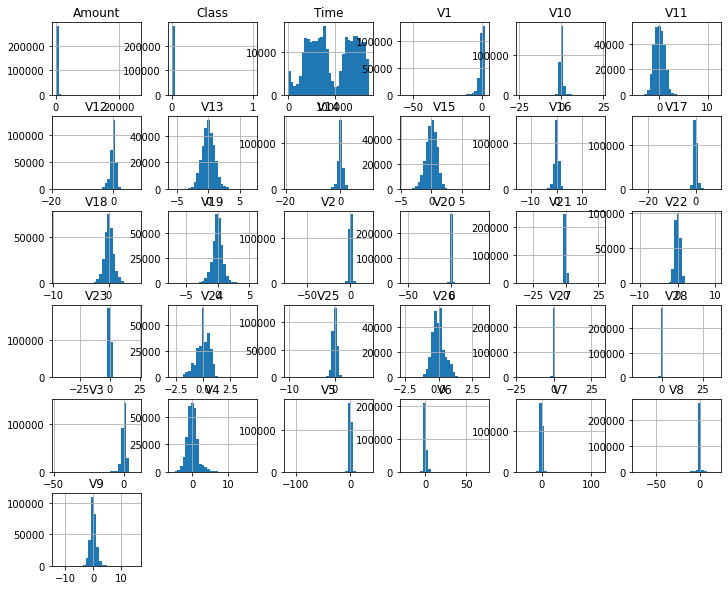

In [ ]:
df.hist(figsize = (12,10), bins=30)

In [ ]:
df['Class'].value_counts()

#print(data.groupby('Class').size())

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
#data.plot(kind='density', subplots=True, layout=(5,7), sharex=False, legend=True, fontsize=1)
#plt.show()

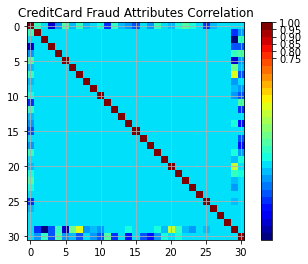

In [ ]:
from matplotlib import cm as cm

fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(df.corr(), interpolation="none", cmap=cmap)
ax1.grid(True)
plt.title('CreditCard Fraud Attributes Correlation')
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


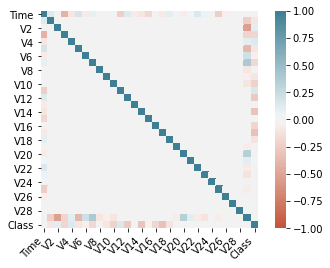

In [ ]:
import seaborn as sns

corr = df.corr()
ax = sns.heatmap(corr, vmin =- 1, vmax = 1, center = 0, 
                  cmap = sns.diverging_palette(20, 220, n=200),
                  square = True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
);

#DATA SPLITTING

In [ ]:
data  = pd.concat([df[:10000],df[40000:50000]])
data['Class'].value_counts()

0    19918
1       82
Name: Class, dtype: int64

In [ ]:
Y = data['Class'].values
X = data.drop('Class', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20)

In [ ]:
print("X_train.shape: ",X_train.shape, "X_test.shape: ",X_test.shape,"Y_train.shape: ", Y_train.shape, "Y_test.shape: ",Y_test.shape)

X_train.shape:  (16000, 30) X_test.shape:  (4000, 30) Y_train.shape:  (16000,) Y_test.shape:  (4000,)


#ENSEMBLE MODELLING USING CROSS VALIDATION

In [ ]:
models_list = []
models_list.append(('CART', DecisionTreeClassifier()))
models_list.append(('SVM', SVC())) 
models_list.append(('NB', GaussianNB()))
models_list.append(('KNN', KNeighborsClassifier()))

In [ ]:
num_folds = 10
results = []
names = []

for name, model in models_list:
    kfold = KFold(n_splits = num_folds)
    start = time.time()
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring = 'accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

CART: 0.999250 (0.000673) (run time: 3.050822)
SVM: 0.996063 (0.001342) (run time: 2.303929)
NB: 0.989688 (0.002742) (run time: 0.104972)
KNN: 0.996188 (0.001324) (run time: 1.262284)


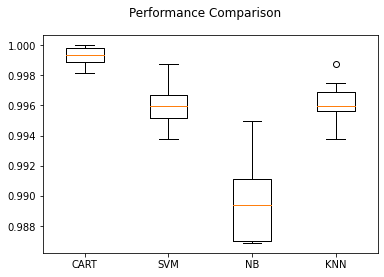

In [ ]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#PIPELINING

In [ ]:
import warnings

# Standardize the dataset
pipelines = []

pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
                                                                        DecisionTreeClassifier())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC( ))])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
                                                                      GaussianNB())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
                                                                       KNeighborsClassifier())])))
results = []
names = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kfold = KFold(n_splits=num_folds, random_state=123)
    for name, model in pipelines:
        start = time.time()
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

ScaledCART: 0.999062 (0.000753) (run time: 3.129308)
ScaledSVM: 0.998687 (0.000946) (run time: 6.099161)
ScaledNB: 0.984500 (0.003281) (run time: 0.208195)
ScaledKNN: 0.999375 (0.000625) (run time: 14.916771)


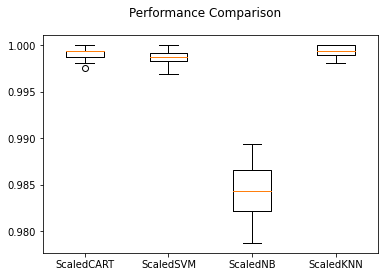

In [ ]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#SVM

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.999625 using {'C': 0.1, 'kernel': 'linear'}
0.999625 (0.000415) with: {'C': 0.1, 'kernel': 'linear'}
0.999563 (0.000628) with: {'C': 0.1, 'kernel': 'poly'}
0.996063 (0.001342) with: {'C': 0.1, 'kernel': 'rbf'}
0.998375 (0.000848) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.999563 (0.000488) with: {'C': 0.3, 'kernel': 'linear'}
0.999500 (0.000468) with: {'C': 0.3, 'kernel': 'poly'}
0.996625 (0.001256) with: {'C': 0.3, 'kernel': 'rbf'}
0.997687 (0.001342) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.999500 (0.000468) with: {'C': 0.5, 'kernel': 'linear'}
0.999438 (0.000519) with: {'C': 0.5, 'kernel': 'poly'}
0.998000 (0.001146) with: {'C': 0.5, 'kernel': 'rbf'}
0.997375 (0.001335) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.999500 (0.000468) with: {'C': 0.7, 'kernel': 'linear'}
0.999438 (0.000519) with: {'C': 0.7, 'kernel': 'poly'}
0.998500 (0.000848) with: {'C': 0.7, 'kernel': 'rbf'}
0.997125 (0.001317) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.999375 (0.000625) with: {'C': 0.9, 'kernel': 'line

In [ ]:
# prepare the model
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
SVM = SVC(C=0.1, kernel='linear')
start = time.time()
SVM.fit(X_train_scaled, Y_train)
end = time.time()
print( "Run Time: %f" % (end-start))

Run Time: 0.091443


In [ ]:
# estimate accuracy on test dataset
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X_test_scaled = scaler.transform(X_test)
SVM_pred = SVM.predict(X_test_scaled)

In [ ]:
print(confusion_matrix(Y_test, SVM_pred))

[[3980    1]
 [   1   18]]


In [ ]:
accuracy = accuracy_score(Y_test, SVM_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.95%


In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, SVM_pred))
print(classification_report(Y_test, SVM_pred))

"""
Accuracy score 0.999500
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3982
           1       1.00      0.89      0.94        18

    accuracy                           1.00      4000
   macro avg       1.00      0.94      0.97      4000
weighted avg       1.00      1.00      1.00      4000
"""

Accuracy score 0.999500
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3981
           1       0.95      0.95      0.95        19

    accuracy                           1.00      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       1.00      1.00      1.00      4000



'\nAccuracy score 0.999500\n              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      3982\n           1       1.00      0.89      0.94        18\n\n    accuracy                           1.00      4000\n   macro avg       1.00      0.94      0.97      4000\nweighted avg       1.00      1.00      1.00      4000\n'

#NB

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
NB_pred = NB.predict(X_test)


In [ ]:
NB.score(X_test, Y_test)

0.98175

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, NB_pred)
print(cm)

[[3908   73]
 [   0   19]]


In [ ]:
accuracy = accuracy_score(Y_test, NB_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.17%


In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, NB_pred))
print(classification_report(Y_test, NB_pred))

"""
Accuracy score 0.980750
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3977
           1       0.23      1.00      0.37        23

    accuracy                           0.98      4000
   macro avg       0.61      0.99      0.68      4000
weighted avg       1.00      0.98      0.99      4000

"""

Accuracy score 0.981750
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3981
           1       0.21      1.00      0.34        19

    accuracy                           0.98      4000
   macro avg       0.60      0.99      0.67      4000
weighted avg       1.00      0.98      0.99      4000



'\nAccuracy score 0.980750\n              precision    recall  f1-score   support\n\n           0       1.00      0.98      0.99      3977\n           1       0.23      1.00      0.37        23\n\n    accuracy                           0.98      4000\n   macro avg       0.61      0.99      0.68      4000\nweighted avg       1.00      0.98      0.99      4000\n\n'

#DT

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [ ]:
print(X.shape)
print(Y.shape)

(600000, 1)
(20000, 1)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='entropy', random_state=0)
DT.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
DT_pred = DT.predict(X_test)

In [ ]:
DT.score(X_test, Y_test)
DT.fit(X_test,Y_test)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, DT_pred)
print(cm)

[[3981    0]
 [   1   18]]


In [ ]:
accuracy = accuracy_score(Y_test, DT_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.98%


In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, DT_pred))
print(classification_report(Y_test, DT_pred))

"""
Accuracy score 1.000000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3977
           1       1.00      1.00      1.00        23

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000
"""

Accuracy score 0.999750
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3981
           1       1.00      0.95      0.97        19

    accuracy                           1.00      4000
   macro avg       1.00      0.97      0.99      4000
weighted avg       1.00      1.00      1.00      4000



'\nAccuracy score 1.000000\n              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      3977\n           1       1.00      1.00      1.00        23\n\n    accuracy                           1.00      4000\n   macro avg       1.00      1.00      1.00      4000\nweighted avg       1.00      1.00      1.00      4000\n'

In [ ]:
!pip install pydotplus

In [ ]:
"""
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

dot_data = StringIO()
filename = "creditcardfraudtree.png"
featureNames = data.columns[:-1]
targetNames = data["Class"].unique().tolist()
out=tree.export_graphviz(DT,feature_names=featureNames, out_file=dot_data, class_names= np.unique(Y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')"""

'\nfrom sklearn.externals.six import StringIO\nimport pydotplus\nimport matplotlib.image as mpimg\nfrom sklearn import tree\n%matplotlib inline \n\ndot_data = StringIO()\nfilename = "creditcardfraudtree.png"\nfeatureNames = data.columns[:-1]\ntargetNames = data["Class"].unique().tolist()\nout=tree.export_graphviz(DT,feature_names=featureNames, out_file=dot_data, class_names= np.unique(Y_train), filled=True,  special_characters=True,rotate=False)  \ngraph = pydotplus.graph_from_dot_data(dot_data.getvalue())  \ngraph.write_png(filename)\nimg = mpimg.imread(filename)\nplt.figure(figsize=(100, 200))\nplt.imshow(img,interpolation=\'nearest\')'

#DECISON TREE BAGGING

In [ ]:
from sklearn.ensemble import BaggingClassifier
Bagging = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=0.5)

In [ ]:
Bagging.fit(X_train, Y_train)
B_pred = Bagging.predict(X_test)
print(Y_test, B_pred)

[0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0]


In [ ]:
Bagging.score(X_test, Y_test)

0.99975

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, B_pred)
print(cm)

[[3981    0]
 [   1   18]]


In [ ]:
accuracy = accuracy_score(Y_test, B_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.98%


In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, B_pred))
print(classification_report(Y_test, B_pred))

"""
Accuracy score 0.999500
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3977
           1       1.00      0.91      0.95        23

    accuracy                           1.00      4000
   macro avg       1.00      0.96      0.98      4000
weighted avg       1.00      1.00      1.00      4000
"""

Accuracy score 0.999750
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3981
           1       1.00      0.95      0.97        19

    accuracy                           1.00      4000
   macro avg       1.00      0.97      0.99      4000
weighted avg       1.00      1.00      1.00      4000



'\nAccuracy score 0.999500\n              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      3977\n           1       1.00      0.91      0.95        23\n\n    accuracy                           1.00      4000\n   macro avg       1.00      0.96      0.98      4000\nweighted avg       1.00      1.00      1.00      4000\n'

#EXTRA TREE CLASSFIER

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
ET = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

ET.fit(X_train, Y_train)
ET.score(X_train, Y_train)

ET_pred = ET.predict(X_test)
ET.score(X_test, Y_test)

0.99975

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, ET_pred)
print(cm)

[[3981    0]
 [   1   18]]


In [ ]:
accuracy = accuracy_score(Y_test, ET_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.98%


In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, ET_pred))
print(classification_report(Y_test, ET_pred))

"""
Accuracy score 0.999250
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3977
           1       1.00      0.87      0.93        23

    accuracy                           1.00      4000
   macro avg       1.00      0.93      0.96      4000
weighted avg       1.00      1.00      1.00      4000
"""

Accuracy score 0.999750
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3981
           1       1.00      0.95      0.97        19

    accuracy                           1.00      4000
   macro avg       1.00      0.97      0.99      4000
weighted avg       1.00      1.00      1.00      4000



'\nAccuracy score 0.999250\n              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      3977\n           1       1.00      0.87      0.93        23\n\n    accuracy                           1.00      4000\n   macro avg       1.00      0.93      0.96      4000\nweighted avg       1.00      1.00      1.00      4000\n'

#RF

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(criterion='entropy', random_state=0)
RF.fit(X_train,Y_train)
RF_pred = RF.predict(X_test)
RF.score(X_test, Y_test)

0.9995

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, RF_pred)
print(cm)

[[3980    1]
 [   1   18]]


In [ ]:
accuracy = accuracy_score(Y_test, RF_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.95%


In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, RF_pred))
print(classification_report(Y_test, RF_pred))

"""
Accuracy score 0.999500
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3977
           1       1.00      0.91      0.95        23

    accuracy                           1.00      4000
   macro avg       1.00      0.96      0.98      4000
weighted avg       1.00      1.00      1.00      4000
"""

Accuracy score 0.999500
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3981
           1       0.95      0.95      0.95        19

    accuracy                           1.00      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       1.00      1.00      1.00      4000



'\nAccuracy score 0.999500\n              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      3977\n           1       1.00      0.91      0.95        23\n\n    accuracy                           1.00      4000\n   macro avg       1.00      0.96      0.98      4000\nweighted avg       1.00      1.00      1.00      4000\n'

#GRADIANT DESCENT CLASSIFIER

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
GB.fit(X_train, Y_train)

GB_pred = GB.predict(X_test)
GB.score(X_test, Y_test)

0.999

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, GB_pred)
print(cm)

[[3977    4]
 [   0   19]]


In [ ]:
accuracy = accuracy_score(Y_test, GB_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.90%


In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, GB_pred))
print(classification_report(Y_test, GB_pred))

"""
Accuracy score 0.998250
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3977
           1       0.81      0.91      0.86        23

    accuracy                           1.00      4000
   macro avg       0.90      0.96      0.93      4000
weighted avg       1.00      1.00      1.00      4000
"""

Accuracy score 0.999000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3981
           1       0.83      1.00      0.90        19

    accuracy                           1.00      4000
   macro avg       0.91      1.00      0.95      4000
weighted avg       1.00      1.00      1.00      4000



'\nAccuracy score 0.998250\n              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      3977\n           1       0.81      0.91      0.86        23\n\n    accuracy                           1.00      4000\n   macro avg       0.90      0.96      0.93      4000\nweighted avg       1.00      1.00      1.00      4000\n'

#XGBOOST

In [ ]:
import xgboost

XGB = xgboost.XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75)
XGB.fit(X_train, Y_train , verbose=False)

XGB_pred = XGB.predict(X_test)

In [ ]:
"""XGBPred = []
for i in XGB_pred:
  for k in i:
    XGBPred.append(str(int(k)))

XGBPred = np.array(XGBPred)
XGBPred"""

'XGBPred = []\nfor i in XGB_pred:\n  for k in i:\n    XGBPred.append(str(int(k)))\n\nXGBPred = np.array(XGBPred)\nXGBPred'

In [ ]:
accuracy = accuracy_score(Y_test, XGB_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.95%


In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, XGB_pred))
print(classification_report(Y_test, XGB_pred))

"""
Accuracy score 0.999750
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3981
           1       0.95      1.00      0.97        19

    accuracy                           1.00      4000
   macro avg       0.97      1.00      0.99      4000
weighted avg       1.00      1.00      1.00      4000
"""

Accuracy score 0.999500
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3981
           1       0.95      0.95      0.95        19

    accuracy                           1.00      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       1.00      1.00      1.00      4000



'\nAccuracy score 0.999750\n              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      3981\n           1       0.95      1.00      0.97        19\n\n    accuracy                           1.00      4000\n   macro avg       0.97      1.00      0.99      4000\nweighted avg       1.00      1.00      1.00      4000\n'

#ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ADABoost = AdaBoostClassifier()
ADABoost.fit(X_train, Y_train)

ADAB_pred = ADABoost.predict(X_test)

In [ ]:
"""ADABPred = []
for i in ADAB_pred:
  for k in i:
    ADABPred.append(str(int(k)))

ADABPred = np.array(ADABPred)
ADABPred"""

'ADABPred = []\nfor i in ADAB_pred:\n  for k in i:\n    ADABPred.append(str(int(k)))\n\nADABPred = np.array(ADABPred)\nADABPred'

In [ ]:
accuracy = accuracy_score(Y_test, ADAB_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.92%


In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, ADAB_pred))
print(classification_report(Y_test, ADAB_pred))

"""
Accuracy score 0.999000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3989
           1       1.00      0.64      0.78        11

    accuracy                           1.00      4000
   macro avg       1.00      0.82      0.89      4000
weighted avg       1.00      1.00      1.00      4000
"""

Accuracy score 0.999250
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3981
           1       0.90      0.95      0.92        19

    accuracy                           1.00      4000
   macro avg       0.95      0.97      0.96      4000
weighted avg       1.00      1.00      1.00      4000



'\nAccuracy score 0.999000\n              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      3989\n           1       1.00      0.64      0.78        11\n\n    accuracy                           1.00      4000\n   macro avg       1.00      0.82      0.89      4000\nweighted avg       1.00      1.00      1.00      4000\n'

#ANN

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow import keras

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [ ]:
Y = df['Class'].values
X = df.drop('Class', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20)

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test =sc_X.transform(X_test)

In [ ]:
model = Sequential()

model.add(Dense(units = 100, activation = 'relu', input_shape=(30,)))

model.add(Dense(units = 50, activation = 'relu'))

model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               3100      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 8,201
Trainable params: 8,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, Y_train, batch_size = 50, nb_epoch = 500)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/500
227845/227845 [==============================] - 6s 28us/step - loss: 0.0063 - accuracy: 0.9991
Epoch 2/500
227845/227845 [==============================] - 6s 27us/step - loss: 0.0031 - accuracy: 0.9994
Epoch 3/500
227845/227845 [==============================] - 6s 27us/step - loss: 0.0028 - accuracy: 0.9994
Epoch 4/500
227845/227845 [==============================] - 6s 27us/step - loss: 0.0024 - accuracy: 0.9995
Epoch 5/500
227845/227845 [==============================] - 6s 28us/step - loss: 0.0023 - accuracy: 0.9995
Epoch 6/500
227845/227845 [==============================] - 6s 28us/step - loss: 0.0021 - accuracy: 0.9995
Epoch 7/500
227845/227845 [==============================] - 6s 27us/step - loss: 0.0019 - accuracy: 0.9996
Epoch 8/500
227845/227845 [==============================] - 6s 27us/step - loss: 0.0019 - accuracy: 0.9995
Epoch 9/500
227845/227845 [==============================] - 6s 27us/step - loss: 0.0016 - accuracy: 0.9996
Epoch 10/500
227845/227845 [

In [ ]:
ANN_pred = model.predict(X_test)

In [ ]:

#Array of list of list to Array of list
Y_new = []
for i in Y_pred:
  for k in i:
    Y_new.append(str(int(k)))
  
Y_new = np.array(Y_new, dtype = object) 

#PRINT
#Y_test, Y_new

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_new)
print(cm)

In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, Y_new))
print(classification_report(Y_test, Y_new))

"""
CASE 1: 
Layer 1 : unit = 10
Layer 2 : unit = 5
Layer 3 : unit = 1
Batch_size = 10, nb_epoch = 100
Accuracy score 0.0.859649

CASE 2: 
Layer 1 : unit = 30
Layer 2 : unit = 15
Layer 3 : unit = 1
Batch_size = 10, nb_epoch = 100
Accuracy score 0.956140

CASE 3: 
Layer 1 : unit = 30
Layer 2 : unit = 15
Layer 3 : unit = 1
Batch_size = 15, nb_epoch = 100
Accuracy score 0.964912 

CASE 4: 
Layer 1 : unit = 30
Layer 2 : unit = 15
Layer 3 : unit = 1
Batch_size = 30, nb_epoch = 100
Accuracy score 0.964912 

CASE 5: 
Layer 1 : unit = 30
Layer 2 : unit = 15
Layer 3 : unit = 1
Batch_size = 30, nb_epoch = 1000
Accuracy score 0.964912 

CASE 6: 
Layer 1 : unit = 30
Layer 2 : unit = 20
Layer 3 : unit = 10
Layer 4 : unit = 1
Batch_size = 30, nb_epoch = 100
Accuracy score 0.964912 

CASE 7:
model = Sequential()
model.add(Dense(units = 30, activation = 'relu', input_shape=(30,)))
model.add(Dense(units = 15, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.summary()

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, Y_train, batch_size = 30, nb_epoch = 1000)

Accuracy score 0.973684
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        75
           1       1.00      0.92      0.96        39

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

CASE 8:
model = Sequential()
model.add(Dense(units = 30, activation = 'relu', input_shape=(30,)))
model.add(Dense(units = 15, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.summary()

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, Y_train, batch_size = 30, nb_epoch = 1000)


Accuracy score 0.982456
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        75
           1       1.00      0.95      0.97        39

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114
"""

************************************************************************

#Deep Learning

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test =sc_X.transform(X_test)

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(units = 455, activation = 'relu', input_shape=(30,)))

# The Hidden Layers :
NN_model.add(Dense(1000, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(500, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(100, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(10, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='sigmoid'))
/
# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

checkpointer = ModelCheckpoint(filepath='weights.best.cnn.hdf5', verbose=1, save_best_only=True) 

In [ ]:
Y = df['Class'].values
X = df.drop('Class', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20)

In [ ]:
NN_model.fit(X_train, Y_train, epochs=1000, batch_size=50, validation_split = 0.2, callbacks=callbacks_list)

In [ ]:
#NN_model.load_weights('weights.best.cnn.hdf5')

In [ ]:
#wights_file = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
#NN_model.load_weights(wights_file) 
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [ ]:
DL_pred = model.predict(X_test)

#Array of list of list to Array of list
DLPred = []
for i in DL_pred:
  for k in i:
    DLPred.append(str(int(k)))
  
DLPred = np.array(DLPred, dtype = object) 

#PRINT
#Y_test, Y_new

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, DLPred)
print(cm)

In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, DLPred))
print(classification_report(Y_test, DLPred))

"""
CASE 1:
#The Input Later
NN_model.add(Dense(units = 100, activation = 'relu', input_shape=(30,)))

# The Hidden Layers :
NN_model.add(Dense(50, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(10, kernel_initializer='normal',activation='relu'))
#NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='sigmoid'))

#RESULT: 
Epoch 00500: val_loss did not improve from 0.00001
Accuracy score 0.964912

CASE 2:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(units = 455, activation = 'relu', input_shape=(30,)))

# The Hidden Layers :
NN_model.add(Dense(200, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(100, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(50, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='sigmoid'))
/
# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

NN_model.fit(X_train, Y_train, epochs=1000, batch_size=30, validation_split = 0.2, callbacks=callbacks_list)

Accuracy score 0.973684
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        75
           1       1.00      0.92      0.96        39

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

CASE 3:

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(units = 455, activation = 'relu', input_shape=(30,)))

# The Hidden Layers :
NN_model.add(Dense(200, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(100, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(50, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='sigmoid'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

NN_model.fit(X_train, Y_train, epochs=1000, batch_size=30, validation_split = 0.2, callbacks=callbacks_list)

Epoch 01000: val_loss did not improve from 0.00000

Accuracy score 0.982456
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        75
           1       1.00      0.95      0.97        39

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114
"""